# Sprawozdanie PSD - lista 1 #
## Stefan Borek (260359) ##
### 6-4-2022 ###

## Zadanie 1 ##

Oblicz widmo transformaty Fouriera dla sygnału reprezentowanego przez funkcję sinus o częstotliwości 100 Hz za pomocą biblioteki NumPy za pomocą własnej implementacji algorytmu Cooleya-Tukeya. Porównaj wyniki.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
# interwał próbkowania
fs = 48000
# czas - 1 sekunda
t = np.linspace(0, 1, 2048)
#częstotliwość
freq = 100
sin_wave = np.sin(2*np.pi*freq*t)
len(sin_wave)

2048

## Własna implementacja algorytmu. ##
Algorytm **Cooleya-Tukeya** liczacy transformatę Fouriera dla ciągu $X\!=\![X_1, X_2, ..., X_N] $ jest zdefiniowany rekurencyjnie jako:\
\
$X(k)\:=\:X_p(k)+e^{-2\pi i \frac{k}{N}}X_n(k) $
$X(k\! +\! N/2)\;=\;X_p(p)+e^{-2\pi i \frac{k}{N}}X_n(k) $\
\
Gdzie:\
$N$ - liczba próbek dyskretnego sygnału dźwiękowego, będąca potęgą dwójki,\
$X_p$ -  ciąg elementów $X$ o indeksach parzystych,\
$X_n$ -  ciąg elementów $X$ o indeksach nieparzystych,\
$k\! \in \! [0, \frac{N}{2}$ - indeks ranej próbki,\
$i$ - jednostka urojona

\
### Rozwiązanie ###

In [10]:
def fft(x):
    N = len(x)
    X = list()
    for k in range(0, N):
        X.append(complex(x[k], 0))
    fft_rec(X)
    return X


def fft_rec(X):
    N = len(X)

    if N <= 1:
        return

    even = np.array(X[0:N:2])
    odd = np.array(X[1:N:2])

    fft_rec(even)
    fft_rec(odd)

    for k in range(0, N // 2):
        t = np.exp(complex(0, -2 * np.pi * k / N)) * odd[k]
        X[k] = even[k] + t
        X[N // 2 + k] = even[k] - t

fourier = fft(sin_wave)

Implementacja przy użyciu biblioteki numpy

In [11]:
fourier2 = np.fft.rfft(sin_wave)

In [12]:
# porównanie wyników
print('Własna implementacja:', fourier[:10])
print('Funkcja NumPy:', fourier2[:10])

Własna implementacja: [(-7.49678097378137e-14+0j), (1.5213269839289834e-05-0.009917501838111915j), (6.087132269394502e-05-0.019840904277572333j), (0.00013702895478519272-0.02977611971870219j), (0.00024377766722719074-0.03972908421376913j), (0.0003812459534103946-0.04970576941006026j), (0.0005495996754292798-0.059712194661492524j), (0.0007490425784503207-0.06975443931081007j), (0.000979816893052196-0.07983865526908396j), (0.0012422040943736307-0.08997107986168468j)]
Funkcja NumPy: [-7.49678097e-14+0.j          1.52132698e-05-0.0099175j
  6.08713227e-05-0.0198409j   1.37028955e-04-0.02977612j
  2.43777667e-04-0.03972908j  3.81245953e-04-0.04970577j
  5.49599675e-04-0.05971219j  7.49042578e-04-0.06975444j
  9.79816893e-04-0.07983866j  1.24220409e-03-0.08997108j]


## Porównanie wyników ##

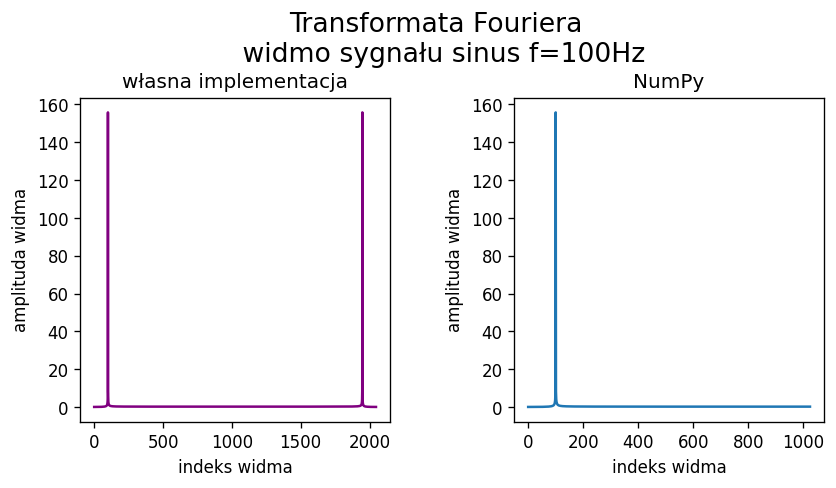

In [13]:
# wykres porównujący wyniki
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=120)

fig.suptitle('Transformata Fouriera \n widmo sygnału sinus f=100Hz', fontsize=16)
ax[0].plot(abs(np.real(fourier[:])), c='purple')
ax[0].set(title='własna implementacja', xlabel='indeks widma', ylabel='amplituda widma')
ax[1].plot(abs(np.real(fourier2[:])))
ax[1].set(title='NumPy', xlabel='indeks widma', ylabel='amplituda widma')
plt.subplots_adjust(top=.8, wspace=.4)

Jak widać na powyższym wykresie zaimplemntowany algorytm jak i funkcja z pakietu NumPy działają niemalże identycznie.

## Zadanie 2. ##
Przygotuj wykres widma amplitudowego dla sygnału 100 Hz oraz zmieszanego sygnału 100, 300
i 500 Hz (czyli amplitudy w zależności od częstotliwości).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Model ##

In [15]:
N = 4096
t = np.arange(N)

# sygnał dla 100Hz
s0 = np.sin(2*np.pi*100*t / fs)
# sygnał złożony z 3 sygnałów: 100, 300, 500
s1 = np.sin(2*np.pi*100*t / fs) + np.sin(2*np.pi*300*t / fs) + np.sin(2*np.pi*500*t / fs)

Text(0.5, 0, 't[s]')

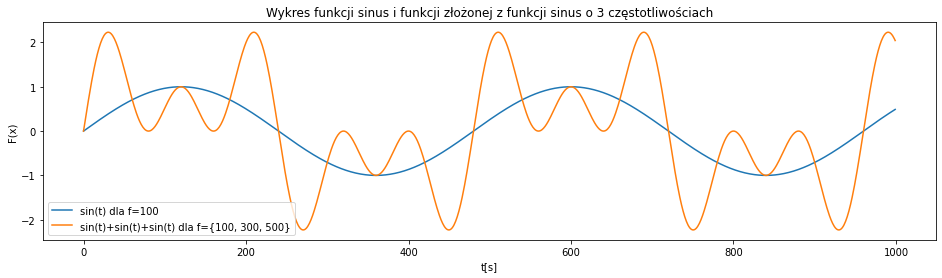

In [16]:
#wykres
plt.figure(figsize = (16, 4))
plt.plot(t[:1000], s0[:1000], label='sin(t) dla f=100')
plt.plot(t[:1000], s1[:1000], label='sin(t)+sin(t)+sin(t) dla f={100, 300, 500}')
plt.title('Wykres funkcji sinus i funkcji złożonej z funkcji sinus o 3 częstotliwościach')
plt.ylabel('F(x)')
plt.legend()
plt.xlabel('t[s]')

In [17]:
# wyliczenie transformaty przy użyciu funkcji z pakietu NumPy
fourier0 = np.fft.rfft(s0)
fourier1 = np.fft.rfft(s1)

## Wyniki ##

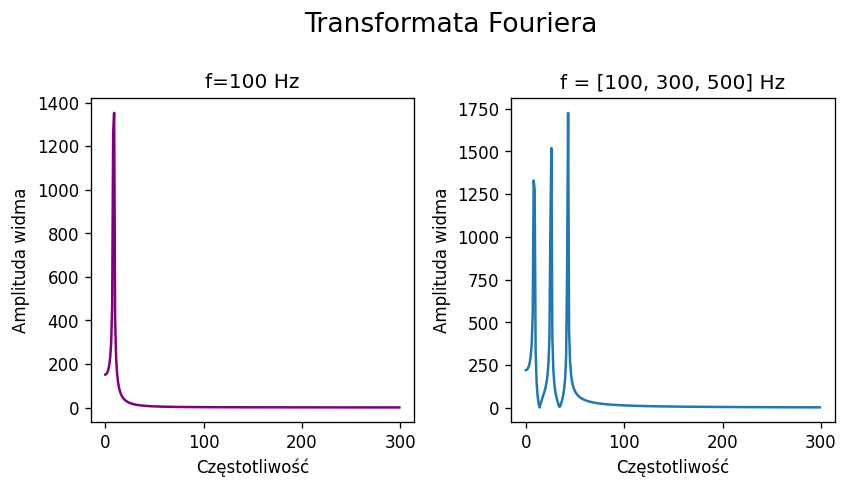

In [18]:
# wykres porównujący wyniki
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=120)

fig.suptitle('Transformata Fouriera', fontsize=16)
ax[0].plot(abs(fourier0)[:300], c='purple')
ax[0].set(title='f=100 Hz', xlabel='Częstotliwość', ylabel='Amplituda widma')
ax[1].plot(abs(fourier1)[:300])
ax[1].set(title='f = [100, 300, 500] Hz', xlabel='Częstotliwość', ylabel='Amplituda widma')
plt.subplots_adjust(top=.8, wspace=0.3)

Na wykresie wyrażnie widać różnicę między dwoma sygnałami. Pokazuje to możliwości transformaty Fouriera. Jeśli nie wiedzielibyśmy jak powstał drugi sygnał, możemy wywnioskować z wykresu że, były to trzy podobne funkcje o różnych częstotliwościach.

## Zadanie 3. ##
Przygotuj wykres widma głośności dla sygnału 100 Hz oraz zmieszanego sygnału 100, 300 i 500
Hz (czyli głośności w zależności od częstotliwości).

## Model ##

Przekrztałcenie wartości amplitud na decybele:

In [19]:
pp0 = abs(np.real(fourier0))/2**10
pp1 = abs(np.real(fourier1))/2**10

L_s0 = list()
L_s1 = list()
for n in range(len(pp0)):
    L_s0.append(20 * math.log10(pp0[n]))
    L_s1.append(20 * math.log10(pp1[n]))

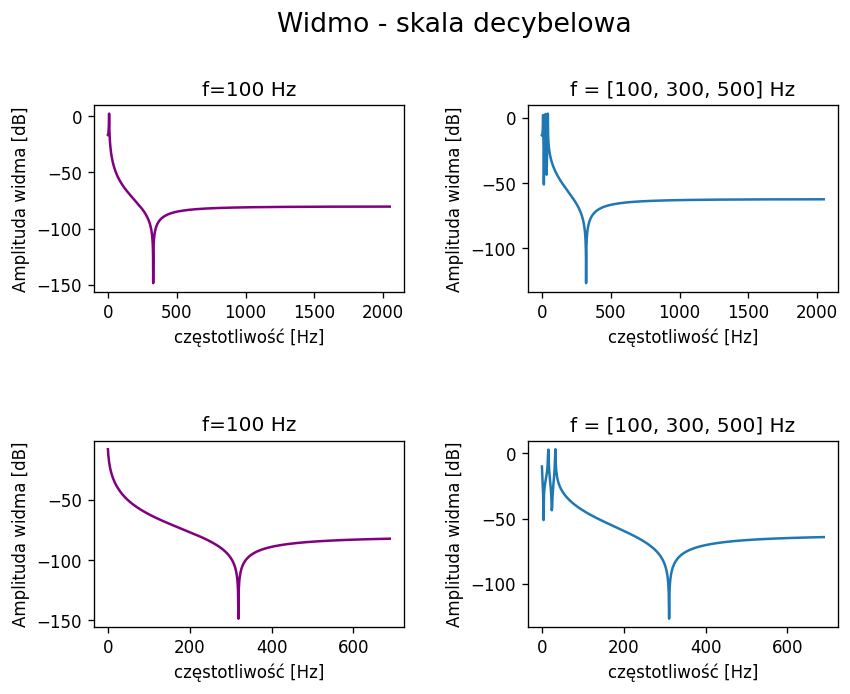

In [20]:
# wykres porównujący wyniki
fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=120)

fig.suptitle('Widmo - skala decybelowa', fontsize=16)
ax[0, 0].plot(L_s0, c='purple')
ax[0, 0].set_title('f=100 Hz')
ax[0, 0].set(ylabel='Amplituda widma [dB]', xlabel='częstotliwość [Hz]')
ax[0, 1].plot(L_s1)
ax[0, 1].set_title('f = [100, 300, 500] Hz')
ax[0, 1].set(ylabel='Amplituda widma [dB]', xlabel='częstotliwość [Hz]')

ax[1, 0].set(ylabel='Amplituda widma [dB]', xlabel='częstotliwość [Hz]')
ax[1, 0].plot(L_s0[10:700], c='purple')
ax[1, 0].set_title('f=100 Hz')
ax[1, 1].set(ylabel='Amplituda widma [dB]', xlabel='częstotliwość [Hz]')
ax[1, 1].plot(L_s1[10:700])
ax[1, 1].set_title('f = [100, 300, 500] Hz')
plt.subplots_adjust(top=.85,
                   hspace=.8,
                   wspace=.4)

Wykresy przedstawiają widmo w skali decybelowej. W pierwszym rzędzie w całym zkaresie w drugim przybliżenie na zachądzące zmiany amplitudy. Ponownie widać wyrażną różnicę między transformowanymi sygnałami.

## Zadanie 4. ##
Przygotuj spektrogram dla sygnału 100 Hz, zmieszanego sygnału 100, 300 i 500 Hz, sygnału
Chirp (trwającego 1 sek, dla zakresu 20-5000 Hz) oraz dźwięku klarnetu z pliku
klarnet.wav.

In [21]:
from scipy.signal import spectrogram, chirp
from scipy.io import wavfile
import wave
import sys

## Model ##

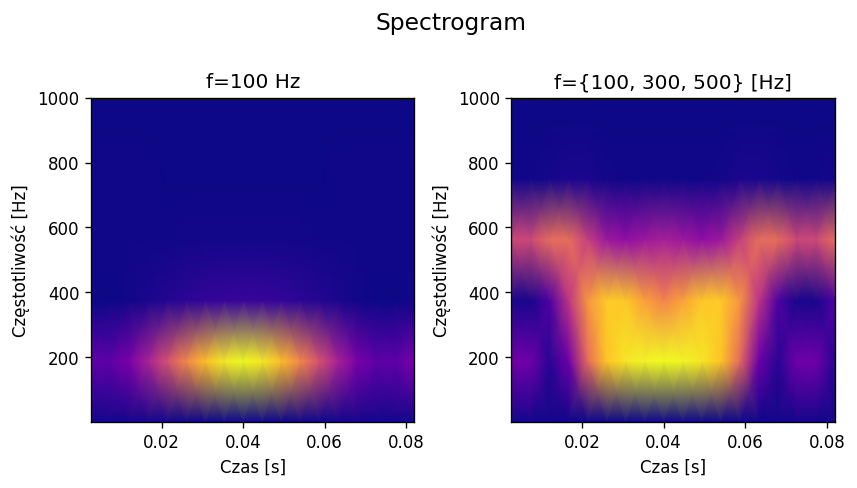

In [22]:
fs = 48000
f0, t0, Sxx0 = spectrogram(x=s0, fs=fs)
f1, t1, Sxx1 = spectrogram(x=s1, fs=fs)

# wykres porównujący wyniki
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=120)
fig.suptitle('Spectrogram', fontsize=14)
ax[0].pcolormesh(t0, f0, Sxx0, shading='gouraud', cmap='plasma')
ax[0].set(
    title='f=100 Hz',
    ylabel='Częstotliwość [Hz]',
    xlabel='Czas [s]'
)
ax[0].set_ylim([1, 1000])

ax[1].pcolormesh(t1, f1, Sxx1, shading='gouraud', cmap='plasma')
ax[1].set(
    title='f={100, 300, 500} [Hz]',
    ylabel='Częstotliwość [Hz]',
    xlabel='Czas [s]'
)
ax[1].set_ylim([1, 1000])

plt.subplots_adjust(
    top=.8,
    wspace=0.3
)


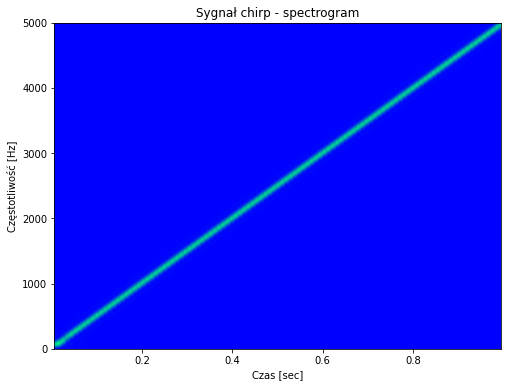

In [23]:
fs = 48000
t = np.linspace(0, 1, fs)
s_chirp = chirp(t, 20, t[-1], 5000)

f, t, Sxx = spectrogram(x=s_chirp, fs=fs, nperseg=512, nfft=2048)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='winter')
plt.ylim(0, 5000)
plt.title('Sygnał chirp - spectrogram')
plt.ylabel('Częstotliwość [Hz]')
plt.xlabel('Czas [sec]')
plt.show()

In [24]:
klarnet_fs, klarnet = wavfile.read('klarnet.wav')

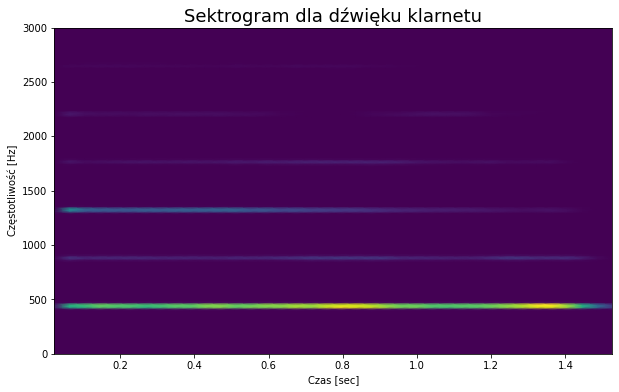

In [25]:
#f, t, Sxx = spectrogram(x=klarnet, fs=klarnet_fs)
f, t, Sxx = spectrogram(x=klarnet, fs=klarnet_fs, window=np.hamming(2048), nperseg=2048)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim(0, 3000)
plt.title('Sektrogram dla dźwięku klarnetu', fontsize=18)
plt.ylabel('Częstotliwość [Hz]')
plt.xlabel('Czas [sec]')
plt.show()

## Zadanie 5. ##
Z dźwięku Chirp zadanego jak wyżej usuń ręcznie (zerując odpowiednie zakresy widma transfor-
maty) oraz za pomocą filtrów low-pass oraz high-pass (zawartych w bibliotece SciPy) górne oraz
dolne 10% częstotliwości sygnału. Odwróć sygnał używając odwrotnej transformaty Fouriera.
Porównaj wyniki.

In [26]:
from scipy.signal import chirp, butter, lfilter
from scipy import fft
import numpy as np

In [40]:
fs = 48000
t = np.linspace(0, 1, fs)
s_chirp = chirp(t, 20, 1, 5000)


In [41]:
chirp_fourier = np.fft.fft(s_chirp)

Text(0.5, 1.0, 'Widmo sygnału Chirp')

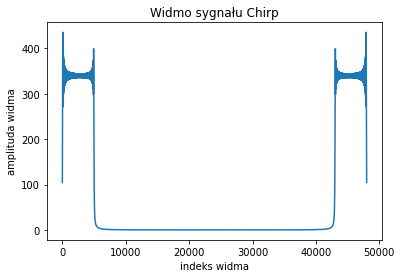

In [42]:
plt.plot(t*fs, abs(chirp_fourier))
plt.xlabel('indeks widma')
plt.ylabel('amplituda widma')
plt.title('Widmo sygnału Chirp')

Ręczne filtrowanie poprzez wyznaczenie 10 i 90 percetylu poprzez funkcję numpy a następnie filtrowanie poprze iterację po liście.

In [43]:
high = np.percentile(abs(chirp_fourier), q=90)
low = np.percentile(abs(chirp_fourier), q=10)

In [45]:
chirp_filtered = list()
for i in range(len(chirp_fourier)):
    n = chirp_fourier[i]
    if n >= high or n <= low:
        chirp_filtered.append(0)
    else:
        chirp_filtered.append(n)


Text(0.5, 1.0, 'Widmo sygnału Chirp')

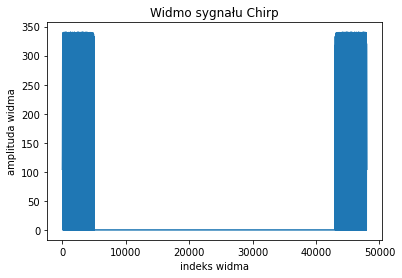

In [46]:
plt.plot(t*fs, np.real(chirp_filtered))
plt.xlabel('indeks widma')
plt.ylabel('amplituda widma')
plt.title('Widmo sygnału Chirp')

In [47]:
ifft = fft.ifft(chirp_filtered)
ifft_original = fft.ifft(np.real(chirp_fourier))

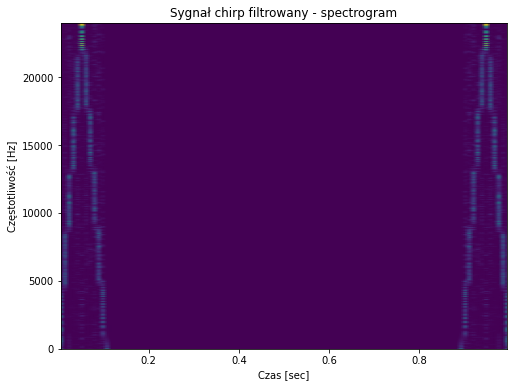

In [51]:
f, t, Sxx = spectrogram(x=np.real(np.asarray(chirp_filtered)), fs=fs, nperseg=512, nfft=2048)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
#plt.ylim(0, 5000)
plt.title('Sygnał chirp filtrowany - spectrogram')
plt.ylabel('Częstotliwość [Hz]')
plt.xlabel('Czas [sec]')
plt.show()

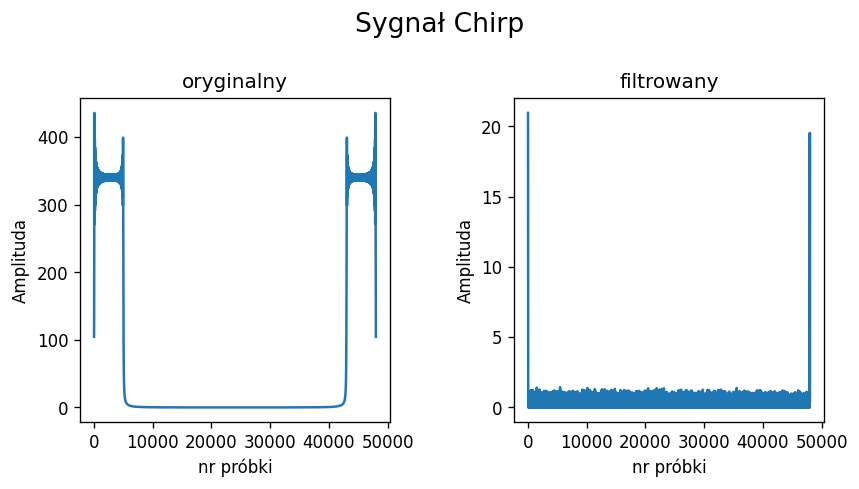

In [50]:
# wykres porównujący wyniki
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=120)

fig.suptitle('Sygnał Chirp', fontsize=16)
ax[0].set(title='oryginalny', xlabel='nr próbki', ylabel='Amplituda')
ax[0].plot(abs(chirp_fourier))
ax[1].set(title='filtrowany', xlabel='nr próbki', ylabel='Amplituda')
ax[1].plot(abs(ifft))


plt.subplots_adjust(top=.8, wspace=.4)

Po filtruwaniu otrzymaliśmy badziej czytelny wykres. Odrzucając skrajne wartości możemy skupić się na tych powtarzalnych.